In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


# Pre-Funciones

In [2]:
from sklearn import metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

def metricas(y_train,y_pred_train,y_test,y_pred_test):
    valores=y.value_counts().index.to_list()
    
    # Matriz de confusion: Train
    cm_train=metrics.confusion_matrix(y_train,y_pred_train,labels=valores)
    df_cm=pd.DataFrame(cm_train,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Train')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    # Matriz de confusion: Test
    cm_test=metrics.confusion_matrix(y_test,y_pred_test,labels=valores)
    df_cm=pd.DataFrame(cm_test,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Test')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    precision_train=metrics.precision_score(y_train,y_pred_train,average='micro')
    precision_test=metrics.precision_score(y_test,y_pred_test,average='micro')
    recall_train=metrics.recall_score(y_train,y_pred_train,average='micro')
    recall_test=metrics.recall_score(y_test,y_pred_test,average='micro')
    f_score=f1_score(y_test,y_pred_test,average='micro')
    
    train = (accuracy_train*100, precision_train*100, recall_train*100)
    test = (accuracy_test*100, precision_test*100, recall_test*100)

    ind = np.arange(3)  # the x locations for the groups
    ind_n = np.arange(4)  # the x locations for the groups
    width = 0.3       # the width of the bars
    
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(111)
    
    rects1 = ax.bar(ind, train, width, color='r')
    rects2 = ax.bar(ind+width, test, width, color='g')
    rects3 = ax.bar(3, f_score*100, width, color='b')
    
    ax.set_ylabel('Scores')
    ax.set_xticks(ind_n + width/2)
    ax.set_xticklabels( ('Accuracy', 'Precisión', 'Recall', 'F1 Score') )
    ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%.3f'%round(h,3),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    plt.title('Puntajes')
    plt.ylim(0,120)
    plt.show()
    
    return 

# Cargando Datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/kaggle/input/glass/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.shape

(214, 10)

# 1. AED

### Tipos de datos de todas las características

Todas las variables son numéricas

In [6]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

### Veremos los valores únicos de cada variables

Analizando los valores únicos podemos observar que las variables todas son de tipo numéricas continuas, además de que el target esta dividido en 7 tipos de glass.

In [7]:
for i in df.columns:
    print("*"*20)
    print(i)
    print(df[i].sort_values().unique())

********************
RI
[1.51115 1.51131 1.51215 1.51299 1.51316 1.51321 1.51409 1.51508 1.51514
 1.51531 1.51545 1.51556 1.51567 1.51569 1.51571 1.51574 1.51588 1.51589
 1.5159  1.51592 1.51593 1.51594 1.51596 1.51602 1.51605 1.51609 1.5161
 1.51613 1.51617 1.51618 1.51623 1.51625 1.51627 1.51629 1.51631 1.5164
 1.51643 1.51645 1.51646 1.51651 1.51652 1.51653 1.51655 1.51658 1.5166
 1.51662 1.51663 1.51665 1.51666 1.51667 1.5167  1.51673 1.51674 1.51683
 1.51685 1.51687 1.51689 1.5169  1.51694 1.51707 1.51708 1.51709 1.51711
 1.51719 1.5172  1.51721 1.51727 1.5173  1.51732 1.51735 1.51736 1.51742
 1.51743 1.51747 1.51748 1.5175  1.51751 1.51753 1.51754 1.51755 1.51756
 1.51761 1.51763 1.51764 1.51766 1.51768 1.51769 1.51775 1.51776 1.51778
 1.51779 1.51783 1.51784 1.51786 1.51789 1.51793 1.51796 1.51797 1.518
 1.51806 1.51808 1.51811 1.51813 1.51818 1.5182  1.51824 1.51829 1.51831
 1.51832 1.51837 1.51838 1.51839 1.51841 1.51844 1.51846 1.51847 1.51848
 1.51851 1.51852 1.5186  1.51869

### Distribución de datos del target

Podemos observar solo hay 6 tipos de glass y que el cuarto tipo de glass no se encuentra.

In [8]:
datos_x = df.Type.value_counts().index.to_list()
datos_y = df.Type.value_counts().to_list()
suma = df.Type.value_counts().sum()
print(df.Type.value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


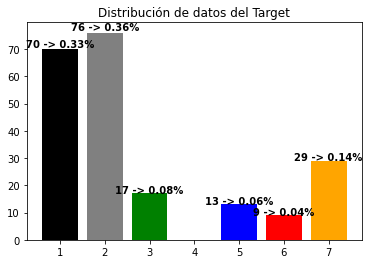

In [9]:
list_color=['grey','black','orange','green','blue','red','red']
graph = plt.bar(datos_x, datos_y, color=list_color)
plt.title('Distribución de datos del Target')

i = 0

for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(height)+" -> "+str(round(height/suma,2))+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()

### Resumen estadístico de cada característica

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


### Análisis gráfico multivariado

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

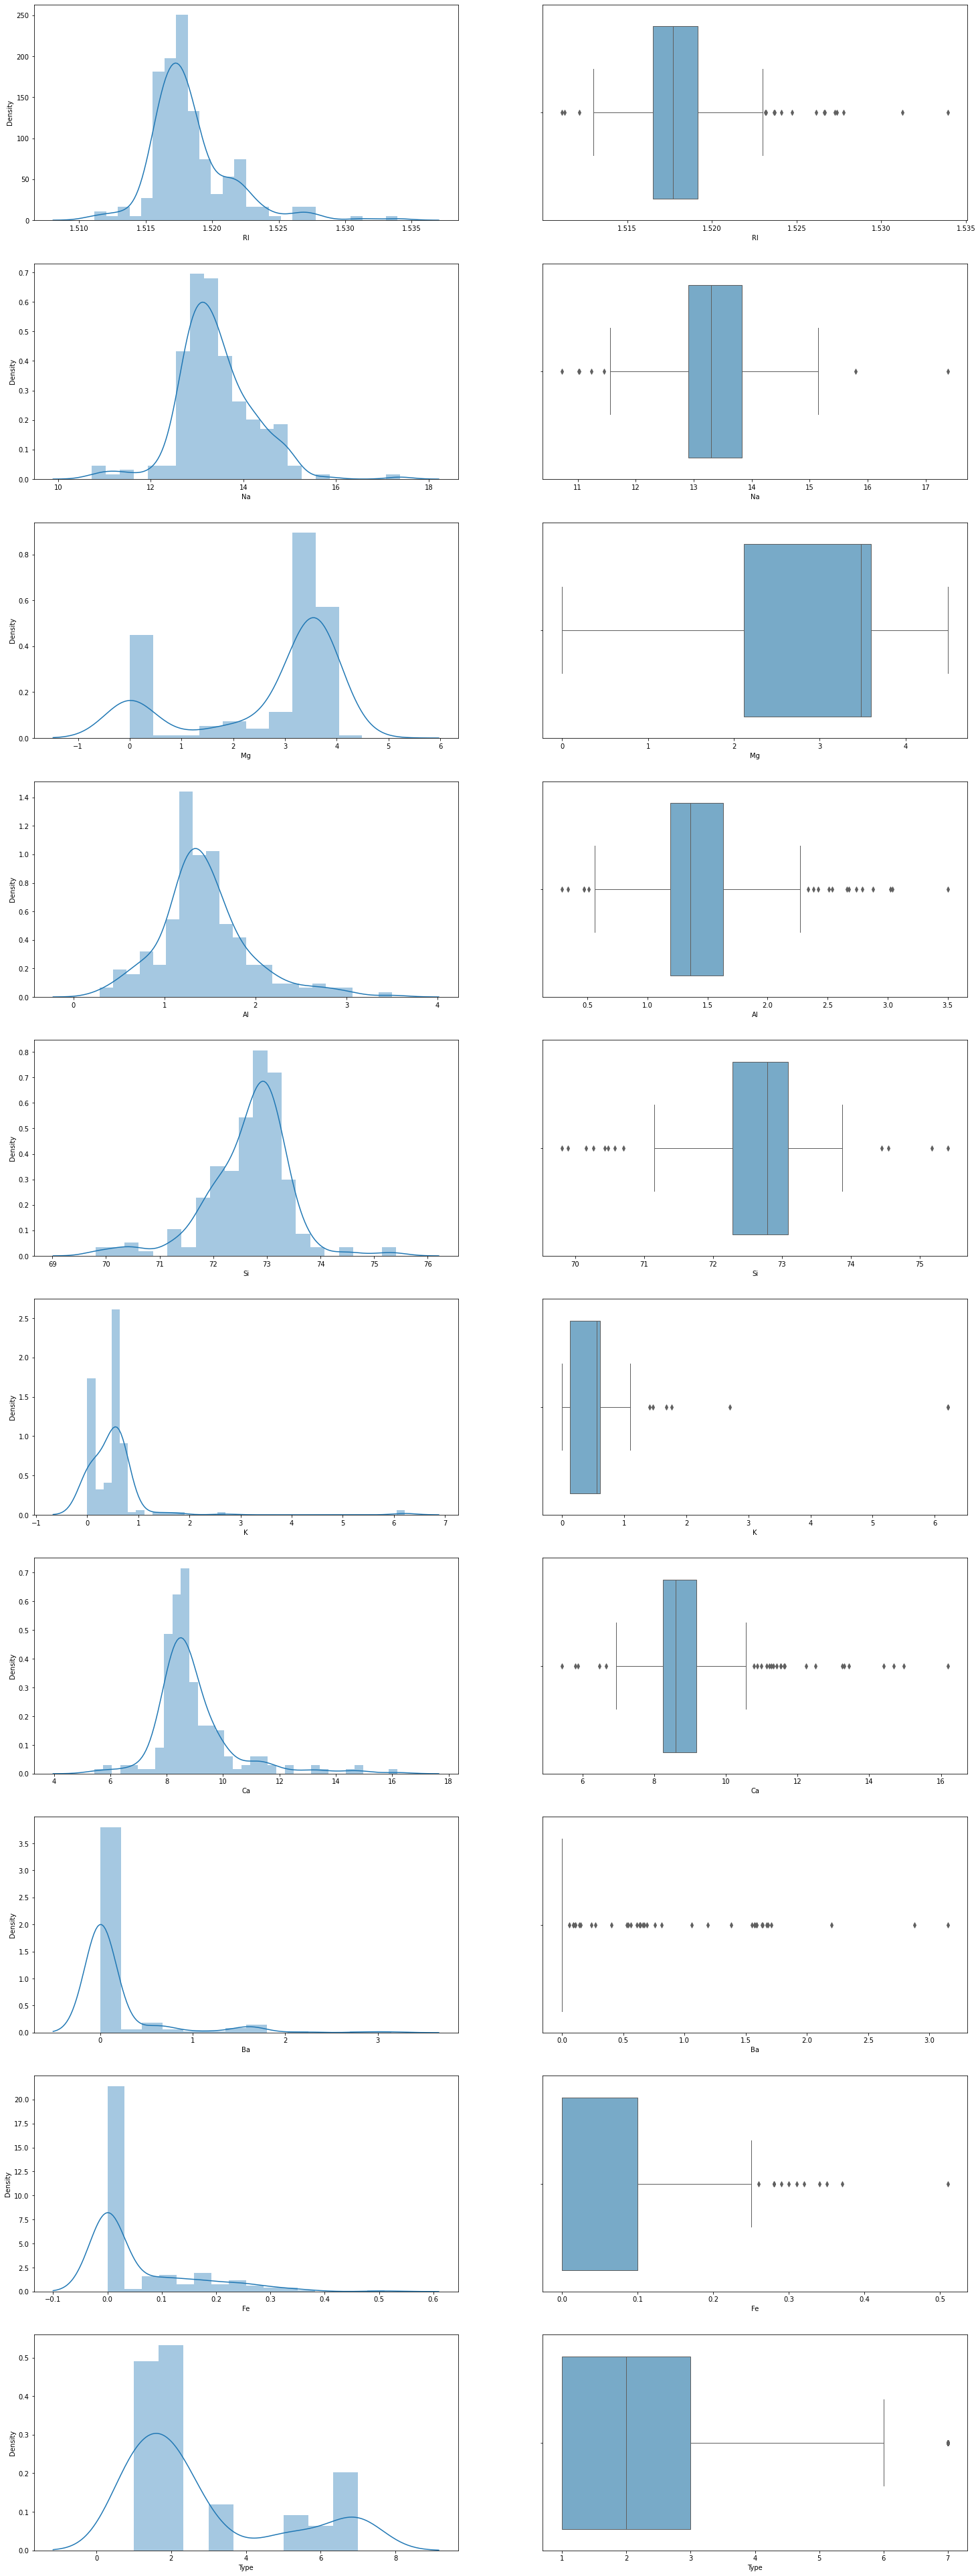

In [11]:
filas=len(df.columns.to_list())
c=1
fig=plt.figure(figsize=(25,7*filas))
    
for i,j in enumerate(df.columns.to_list()):
    plt.subplot(filas,2, c)
    sns.distplot(df[j])
    c = c + 1
    
    plt.subplot(filas,2, c)
    ax1=sns.boxplot(x=df[j],palette="Blues",linewidth=1)
    c = c + 1

plt.show()

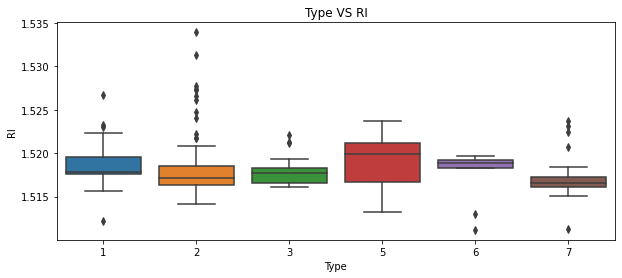

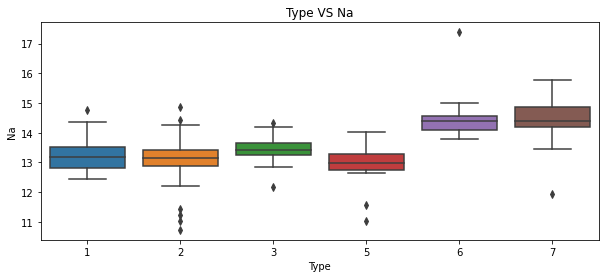

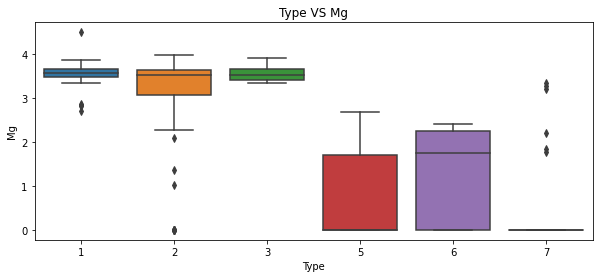

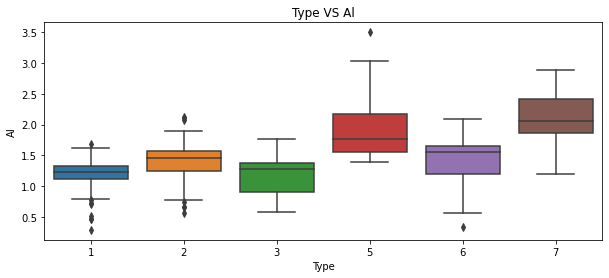

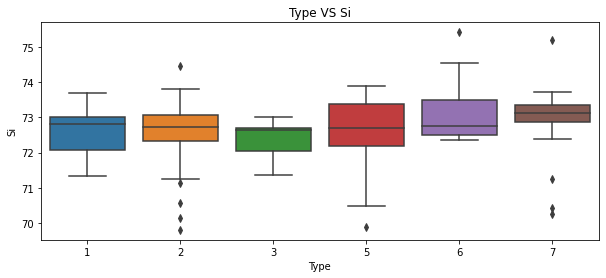

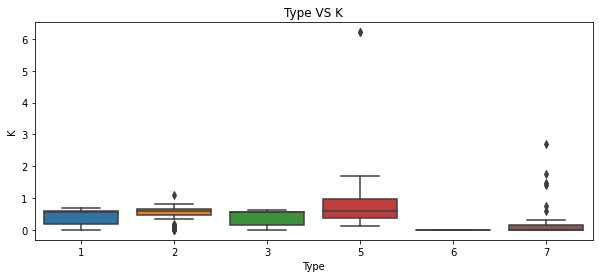

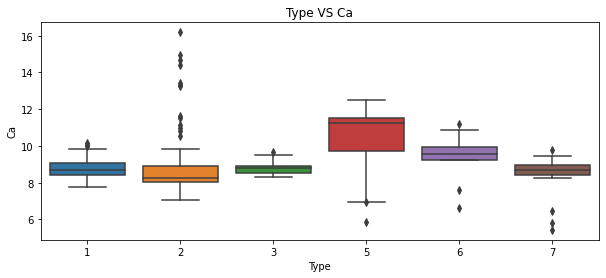

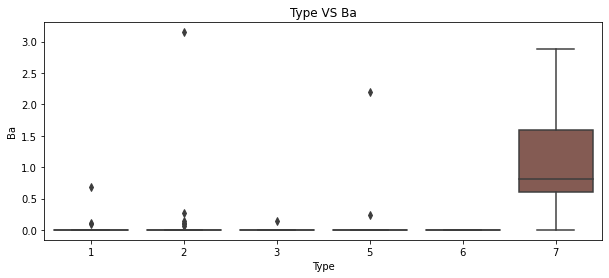

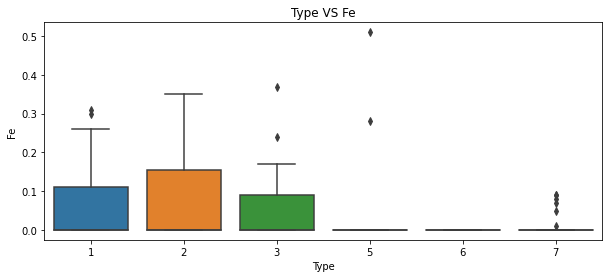

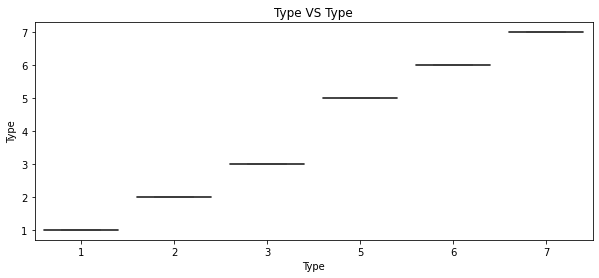

In [12]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='Type', y=i, data=df)
    plt.title("Type VS "+i)
    plt.show()

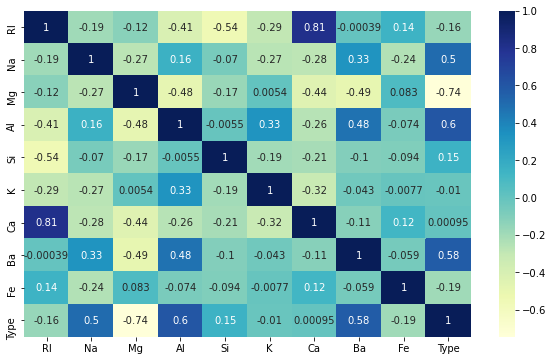

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Aqui observamos que al hacer un gráfico de las 3 variables más correlacionadas al target, se forma una especie de alejamiento de los glass de tipo 7, un alejamiento en glass de tipo 6 y 5, y mucha junta de datos los datos en los glass de tipo 1, 2 y 3.

In [14]:
fig = px.scatter_3d(df, x='Mg', y='Al', z='Ba',
              color='Type')
fig.show()

# 2. Limpieza de Datos

## 2.1. Completitud de Datos

No encontramos datos nulos

In [15]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# 3. Feature Engineering

## 3.1. Creación de Características

In [16]:
df_fi = df.copy()

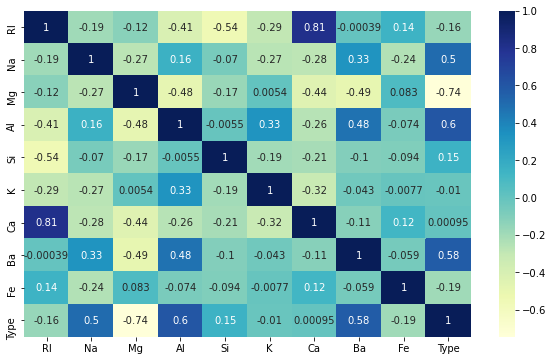

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_fi.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
df_fi['nuevo'] = df_fi['Mg']*df_fi['Al']+df_fi['Ba']

## 3.2. Feature Extraction (PCA)

Las pocas características, que tienen poca correlación y las pocas variables altamente correlacionadas. Nos conviene realizar un Feature Extraction con PCA.

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop('Type',axis=1))
pca.explained_variance_ratio_

array([4.76205247e-01, 2.63192760e-01, 1.07800432e-01, 1.02024637e-01,
       3.30672372e-02, 1.60477360e-02, 1.42743130e-03, 2.34365001e-04,
       1.53917702e-07])

% Var. explicada (1 componentes):  47.62052471305967
% Var. explicada (2 componentes):  73.93980075221333
% Var. explicada (3 componentes):  84.71984391721054
% Var. explicada (4 componentes):  94.92230765479248
% Var. explicada (5 componentes):  98.22903137677493
% Var. explicada (6 componentes):  99.83380497779835
% Var. explicada (7 componentes):  99.97654810810076
% Var. explicada (8 componentes):  99.99998460822987
% Var. explicada (9 componentes):  100.00000000000003


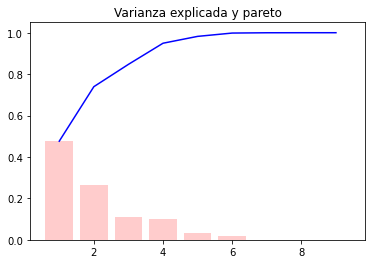

In [20]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)
    
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='red')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=4,color='blue')
plt.title("Varianza explicada y pareto")
plt.show()

Observamos la importancia de las variables para las nuevas variables generadas por el PCA.

In [21]:
pcaFin = PCA(n_components=3)
pcaFin.fit(df.drop('Type',axis=1))
pd.DataFrame(pcaFin.components_,columns=df.drop('Type',axis=1).columns.to_list())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.000928,0.017225,-0.723535,0.046335,-0.007694,-0.078404,0.679717,0.076358,0.000906
1,-0.001523,0.398798,-0.543051,0.258841,0.194092,0.103827,-0.616725,0.223545,-0.016784
2,-0.001377,-0.654935,-0.131199,0.055652,0.691951,0.218565,-0.078778,-0.133876,0.007213


In [22]:
X = pcaFin.transform(df.drop('Type',axis=1))
X = pd.DataFrame(X)
X.head()

,0,1,2
0,-1.431425,-1.102115,-1.066958
1,-1.436707,0.343585,-0.277824
2,-1.427322,0.345720,0.138708
3,-1.257825,-0.249060,0.057742
4,-1.312466,-0.018405,0.357510


In [23]:
df_pca = X.copy()
df_pca['Target'] = df['Type']

En un pairplot de las 3 variables generadas por el PCA, podemos observar un mejor alejamiento de los tipos de glass. Esto favorece al algoritmo, para que pueda realizar una mejor predicción del modelo.

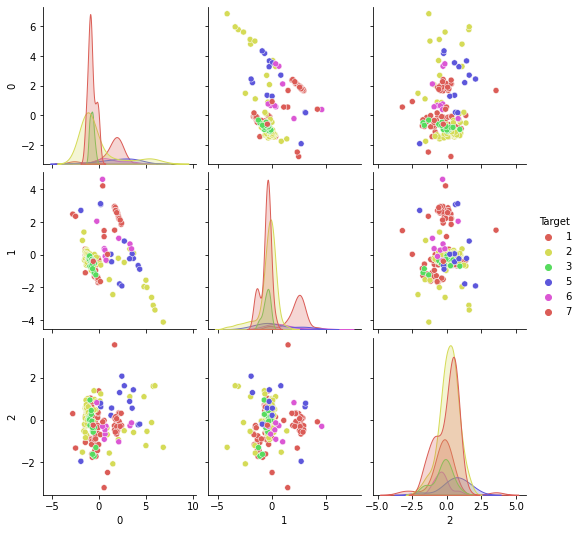

In [24]:
sns.pairplot(df_pca, hue='Target', palette='hls')
plt.show()

Podemos observar que con las 3 variables de PCA, los diferentes tipos de glass se distancian aún más, lo que favorece a la predicción del algoritmo.

In [25]:
fig = px.scatter_3d(df_pca, x=0, y=1, z=2,
              color='Target')
fig.show()

# 4. Entrenamiento y Validación

In [26]:
X = df_pca.drop('Target', axis=1)
y = df_pca.Target

## 4.1. Partición Muestral

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

## 4.2. Algoritmos de Machine Learning

## GridSearchCV with RF

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[300,400,500,600,700,800],
              'max_depth':[5,6,7,8,9,10] ,
              'n_jobs':[-1],
              'max_features':[1,2]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=parameters)

In [29]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]})

In [30]:
best_param= grid_search.best_params_
best_param

{'max_depth': 5, 'max_features': 1, 'n_estimators': 500, 'n_jobs': -1}

In [31]:
best_model = grid_search.best_estimator_

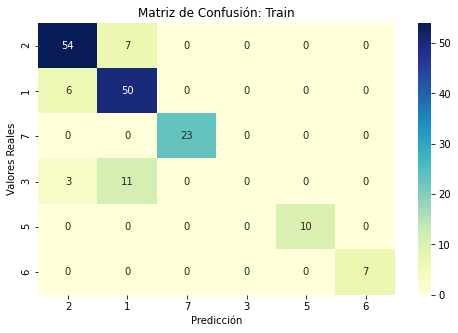

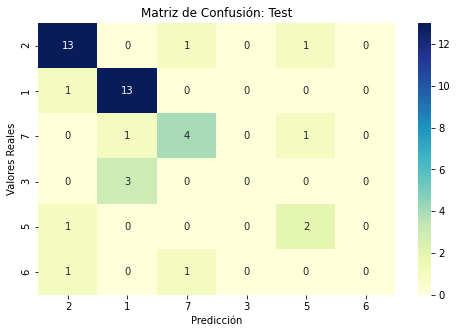

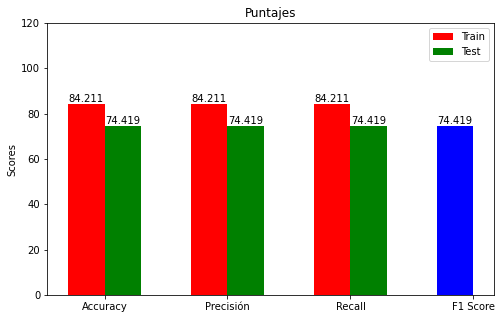

In [32]:
y_pred_train=best_model.predict(X_train)
y_pred_test= best_model.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### Regresión Logística

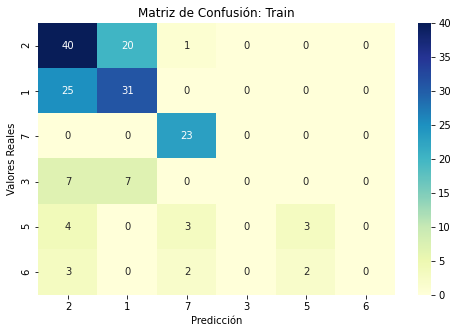

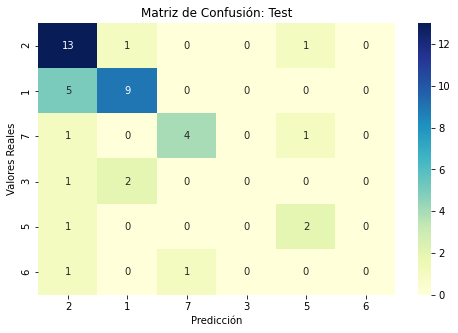

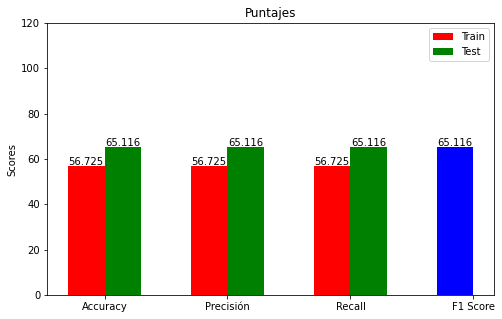

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto')
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test= lr.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### Árboles de Decisión

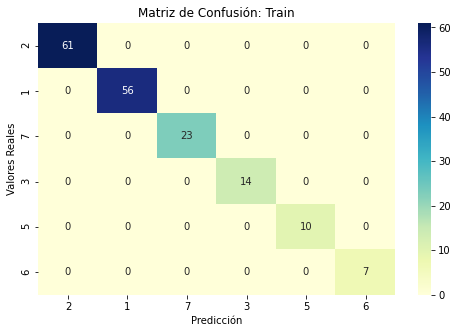

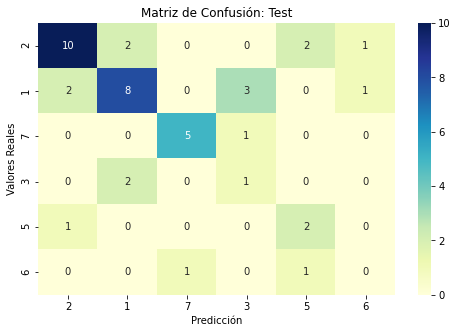

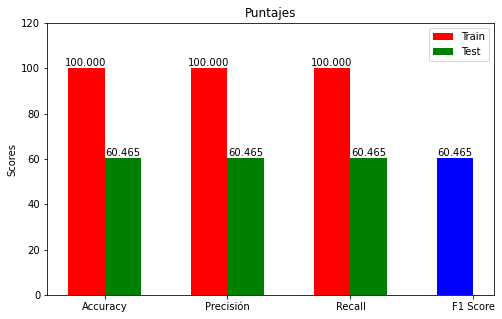

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_train,y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### Bosques Aleatorios

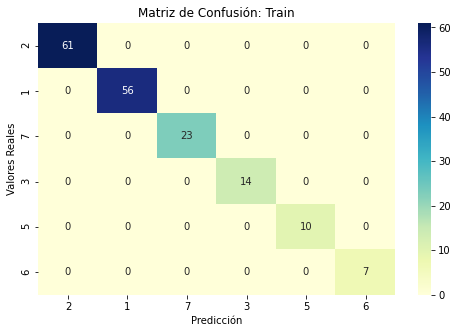

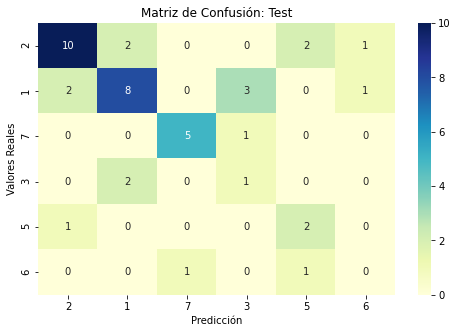

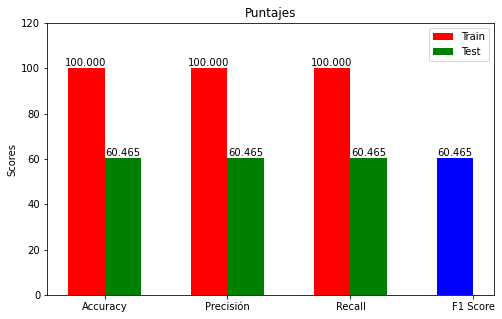

In [35]:
from sklearn.ensemble import RandomForestClassifier
"""
rf = RandomForestClassifier(n_estimators=500,     # Numero de arboles
                            max_features=3,       # Numero de variables por arbol
                            min_samples_leaf=15,  # Numero de obs por nodo hoja
                            min_samples_split=40) # Numero de obs por nodo hoja
"""
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### AdaBoost

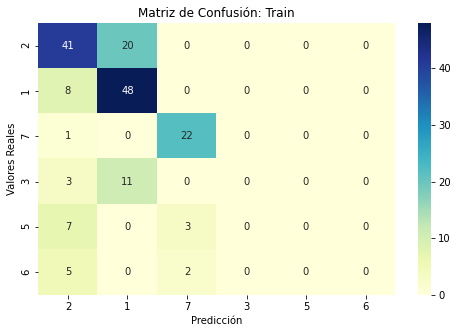

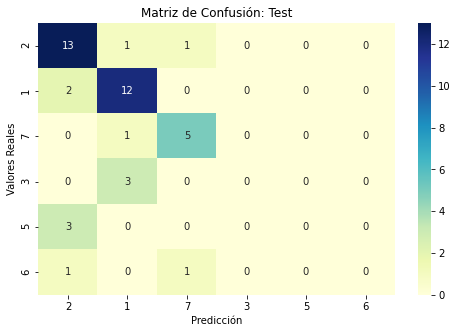

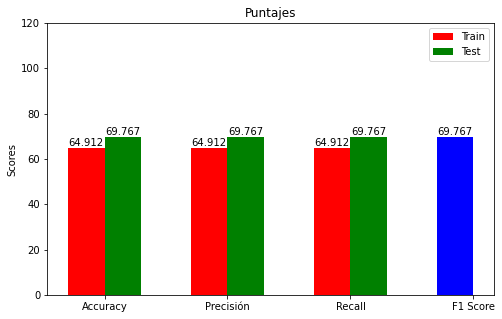

In [36]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost=AdaBoostClassifier(learning_rate=0.001, n_estimators=250)
AdaBoost.fit(X_train, y_train)
y_pred_train = AdaBoost.predict(X_train)
y_pred_test = AdaBoost.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### XGBoost

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:43:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


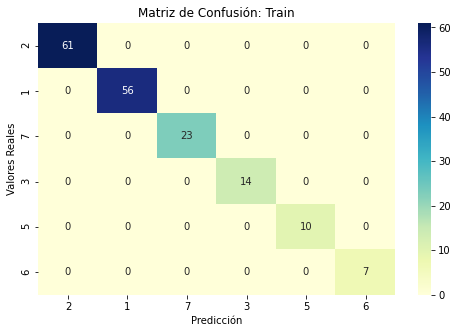

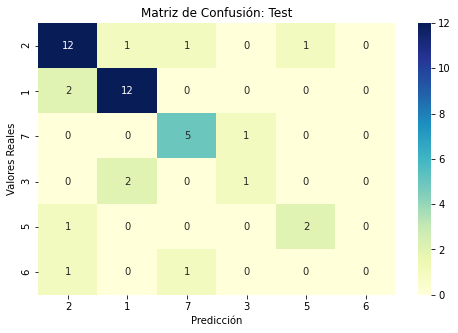

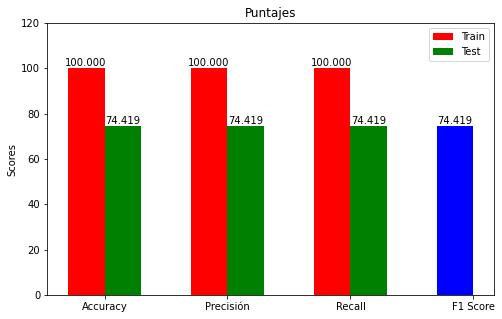

In [37]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### K-Nearest Neighbors

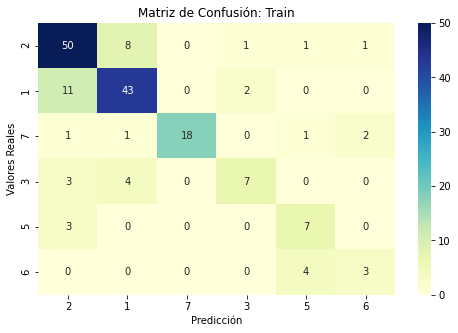

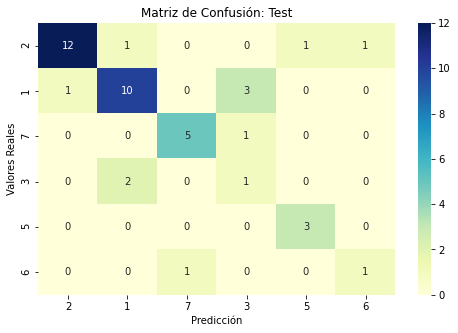

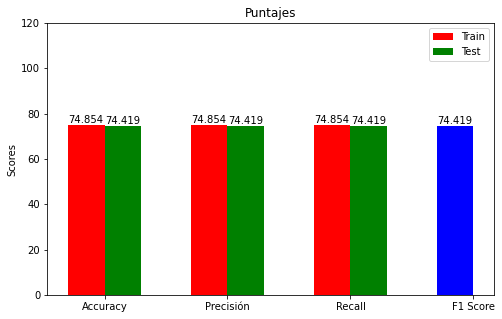

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

### GBM

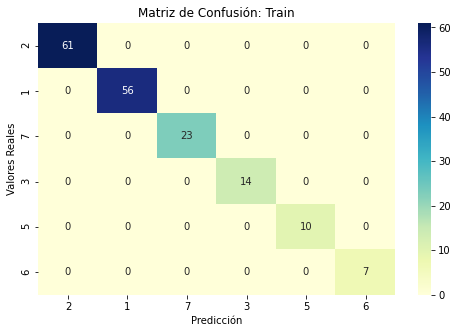

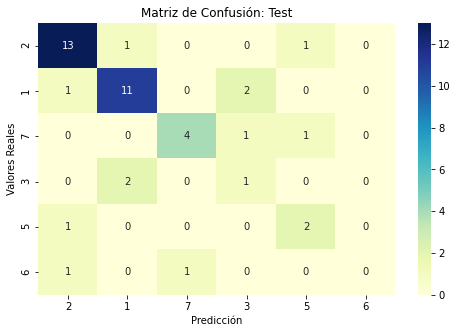

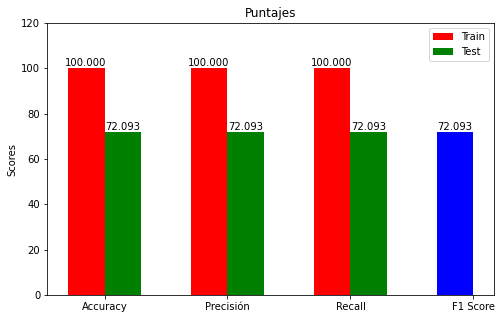

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, 
                                    min_samples_split=2, min_samples_leaf=1, subsample=1,
                                    max_features='sqrt', random_state=10)
gbm.fit(X_train,y_train)
y_pred_train=gbm.predict(X_train)
y_pred_test= gbm.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)